# Logistic Regression


## 1.환경준비

### (1) import

In [1]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

### (2) 데이터 준비

In [2]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV"
data = pd.read_csv(path)
data.head()

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	BusinessTravel	|	출장빈도	|	범주	|Travel_Rarely, Travel_Frequently, Non-Travel		|
|	feature	|	Department	|	부서	|	범주	|Research & Development, Sales, Human Resources	|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	EmployeeNumber	|	사번	|	??	|		|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	RelationshipSatisfaction	|	관계만족도	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High|
|	feature	|	StockOptionLevel	|	스톡옵션레벨	|	범주	| 0 : 없음, 1~3 (클수록 스톡옵션을 많이 받음|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High

## 2.데이터 준비

### (1) 데이터 정리

In [3]:
data.drop('EmployeeNumber', axis = 1, inplace = True)

### (2) 데이터분할1 : x, y 나누기

In [4]:
# x와 y 분리
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) NA 조치

### (4) 가변수화

In [5]:
cat_cols = ['Gender','JobSatisfaction','MaritalStatus','OverTime']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

### (5) 데이터분할2 : train : validation 나누기

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 2022)

### (6) Scaling

## 3.모델링

### (1) 필요한 함수 불러오기

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import * 

### (2) 선언

In [8]:
model = LogisticRegression()

### (3) 모델링(학습)

In [9]:
model.fit(x_train, y_train)

LogisticRegression()

* 모델의 coeficient, intercept 확인

In [10]:
print(list(x_train)) # 칼럼 이름을 리스트로 보여줘

['Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 'Gender_Male', 'JobSatisfaction_2', 'JobSatisfaction_3', 'JobSatisfaction_4', 'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes']


In [11]:
print(model.coef_)

[[-4.04972610e-02  3.58412796e-02 -5.89744031e-05 -2.54484859e-02
  -4.36839618e-02  2.35739580e-01 -2.23874150e-01 -1.07603297e-01
  -3.18739618e-01 -4.21459529e-01  8.60728580e-01  1.29730760e+00]]


### (4) 검증 : 예측

In [12]:
pred = model.predict(x_val)

In [13]:
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### (5) 검증 : 평가

In [14]:
# 정분류율
accuracy_score( y_val , pred )

0.8523676880222841

## 4.분류 모델 평가

### (1) Confusion Matrix
https://en.wikipedia.org/wiki/Confusion_matrix

In [15]:
confusion_matrix( y_val , pred  )

array([[293,   7],
       [ 46,  13]], dtype=int64)

### (2) classification_report
* 분류문제 평가지표 종합판
* print 문으로 결과를 출력해야 제대로 보임.

In [16]:
classification_report(y_val , pred  )

'              precision    recall  f1-score   support\n\n           0       0.86      0.98      0.92       300\n           1       0.65      0.22      0.33        59\n\n    accuracy                           0.85       359\n   macro avg       0.76      0.60      0.62       359\nweighted avg       0.83      0.85      0.82       359\n'

In [17]:
print(classification_report(y_val , pred  ))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       300
           1       0.65      0.22      0.33        59

    accuracy                           0.85       359
   macro avg       0.76      0.60      0.62       359
weighted avg       0.83      0.85      0.82       359



### (3) 다양한 성능평가 함수들 

In [18]:
# 정분류율
accuracy_score(y_val, pred)

0.8523676880222841

In [19]:
# 정밀도
print(precision_score(y_val, pred, pos_label = 0))
print(precision_score(y_val, pred, pos_label = 1))

0.8643067846607669
0.65


In [20]:
# 재현율
print(recall_score(y_val, pred, pos_label = 0))
print(recall_score(y_val, pred, pos_label = 1))

0.9766666666666667
0.22033898305084745


In [21]:
# f1_score
print(f1_score(y_val, pred, pos_label = 0))
print(f1_score(y_val, pred, pos_label = 1))

0.9170579029733958
0.3291139240506329


### (참조) cut-off에 따른 성능 그래프 : precision recall curve

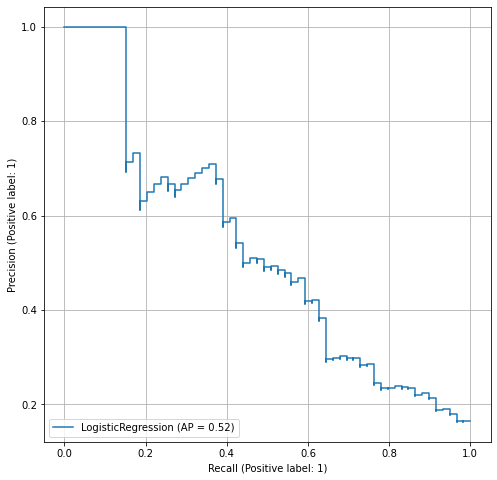

In [22]:
plt.figure(figsize = (8,8))
pr_curve = plot_precision_recall_curve(model, x_val, y_val, ax = plt.gca())
plt.grid()
plt.show()
# ax = plt.gca() 옵션은, plt.#### 함수들을 함께 사용할 수 있게 해줍니다.

plot_precision_recall_curve의 결과를 저장하고  
.average_precision 속성을 불러오면, 계산된 아래 면적을 알 수 있습니다.

In [23]:
pr_curve.average_precision

0.5234729989420233

## 5.실습 : 이동통신 가입 고객 이탈 예측

* 여러분은 OO 통신회사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 예측 모델링을 의뢰하였습니다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (Target 변수)


### (1) 데이터 전처리

In [24]:
# 데이터를 불러옵시다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)

In [25]:
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


* 변수정리 : 불필요한 변수를 정리합시다.
    * 식별자 : 일련번호, 주민번호, 전화번호, 고객ID, 사번 
    * 시계열 데이터 중 : 어떤 기간동안 거의 변화가 없는 값.(변동이 거의 없는) 값.


In [26]:
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True )

* x, y 분할

In [27]:
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화 

In [28]:
dumm_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

* train, val 분할

In [29]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.3)

### (2) 모델링 : 로지스틱 회귀
* 로지스틱 회귀 모델을 만들고
* 성능 평가를 해 봅시다.

In [30]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)
pred1 = model1.predict(x_val)

In [31]:
print(confusion_matrix(y_val, pred1))
print('💘'*20)
print(classification_report(y_val, pred1))

[[1776 1193]
 [1049 1982]]
💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘
              precision    recall  f1-score   support

       LEAVE       0.63      0.60      0.61      2969
        STAY       0.62      0.65      0.64      3031

    accuracy                           0.63      6000
   macro avg       0.63      0.63      0.63      6000
weighted avg       0.63      0.63      0.63      6000



### (3) 모델링 : KNN
* 스케일링을 수행
* KNeighborsClassifier 를 불러와서 모델링
* 성능 평가를 해 봅시다.

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
model2 = KNeighborsClassifier(n_neighbors = 50)
model2.fit(x_train_s, y_train)
pred2 = model2.predict(x_val_s)

In [35]:
print(confusion_matrix(y_val, pred2))
print('💘'*20)
print(classification_report(y_val, pred2))

[[1567 1402]
 [ 984 2047]]
💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘
              precision    recall  f1-score   support

       LEAVE       0.61      0.53      0.57      2969
        STAY       0.59      0.68      0.63      3031

    accuracy                           0.60      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.60      0.60      0.60      6000



In [36]:
print(confusion_matrix(y_val, pred1))
print('💘'*20)
print(classification_report(y_val, pred1))

[[1776 1193]
 [1049 1982]]
💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘
              precision    recall  f1-score   support

       LEAVE       0.63      0.60      0.61      2969
        STAY       0.62      0.65      0.64      3031

    accuracy                           0.63      6000
   macro avg       0.63      0.63      0.63      6000
weighted avg       0.63      0.63      0.63      6000

